# Lung Cancer Prediction Data

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

In [59]:
import warnings
warnings.filterwarnings('ignore')

### EDA 절차

1. 데이터 로드
- 다양한 소스에서 데이터를 로드한다. (파일, 데이터베이스, API 등에서 데이터를 불러온다.)
- 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.
2. 데이터 구조 및 기초 통계 확인
- 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
- 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
- df.head(), df.info(), df.describe() 등의 함수를 사용한다.
3. 결측치 및 이상치 탐색
- 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
- 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
- df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.
4. 데이터 시각화를 통한 탐색
- 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
- 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
- sns.countplot(), sns.heatmap() 등의 함수를 사용한다.
5. 데이터 정제 및 전처리
- 필요 없는 변수나 중복 데이터를 제거한다.
- 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다.
- df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.
6. 데이터 변환 및 피처 엔지니어링
- 새로운 피처를 생성하거나 기존 피처를 변환하여 분석에 적합한 형태로 데이터를 조정한다.
- 로그 변환, 다항식 피처 추가 등 다양한 기법을 통해 데이터를 변환할 수 있다.
- np.log(), PolynomialFeatures() 등의 함수를 활용한다.
7. 데이터 분할
- 학습용과 테스트용 데이터로 분할한다.
- 이 과정은 모델을 평가하고 성능을 검증하는 데 중요한 단계이다.
- train_test_split() 함수를 사용한다.

### 1. 데이터 로드하기

In [4]:
# !pip install kagglehub

  Using cached kagglehub-0.3.10-py3-none-any.whl.metadata (31 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kagglehub-0.3.10-py3-none-any.whl (63 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/cancer-patients-and-air-pollution-a-new-link")

print("Path to dataset files:", path)

100%|██████████| 7.36k/7.36k [00:00<00:00, 7.53MB/s]

Extracting files...
Path to dataset files: C:\Users\Playdata\.cache\kagglehub\datasets\thedevastator\cancer-patients-and-air-pollution-a-new-link\versions\2


In [51]:
df = pd.read_csv('../data/cancer_patient_data_sets.csv')
df.head() # 맨 앞 인덱스 없애기

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


---

### 2. 데이터 구조 및 기초 통계 확인
- 1000개의 행, 26개의 컬럼
- Patient Id를 제외한 모든 컬럼의 값은 정수형 데이터로 저장

- 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
- 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
- df.head(), df.info(), df.describe() 등의 함수를 사용한다.

In [6]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [21]:
df.describe().iloc[:, :10]

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000


In [22]:
df.describe().iloc[:, 10:20]

,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000
std,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000
max,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000


In [23]:
df.describe().iloc[:, 20:]

,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.923000,3.536000,3.853000,2.926000
std,2.388048,1.832502,2.039007,1.474686
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,4.000000,3.000000,4.000000,3.000000
75%,5.000000,5.000000,6.000000,4.000000
max,9.000000,7.000000,7.000000,7.000000


---

### 3. 결측치 및 이상치 탐색
- 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
- 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
- df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.


In [7]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

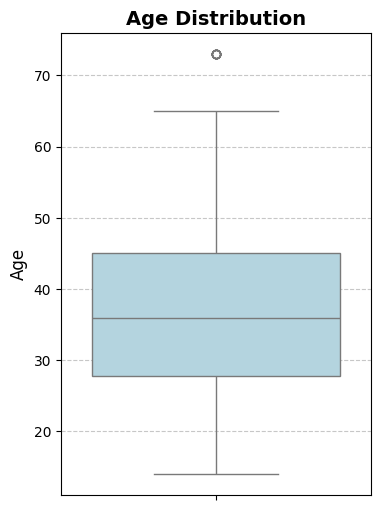

In [ ]:
# 연령 분포 시각화
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Age'], color='lightblue')
plt.title("Age Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Age", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

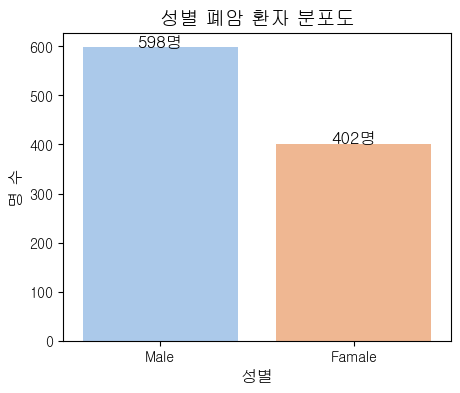

In [60]:
# gender별 개수 계산 시각화

# Gender 숫자 → 텍스트 변환
df['Gender'] = df['Gender'].replace({1: 'Male', 2: 'Famale'})

# 그래프 그리기
plt.figure(figsize=(5, 4))
ax = sns.countplot(x=df['Gender'], palette='pastel')

# 각 bar 위에 개수 추가
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2  # 막대의 중심
    y = bar.get_height()  # 막대 높이
    label = bar.get_x()  # Male, Female 라벨
    plt.text(x, y + 0.5, f"{int(y)}명", ha='center', fontsize=12, fontweight='bold', color='black')

plt.title("성별 폐암 환자 분포도", fontsize=14, fontweight='bold')
plt.xlabel("성별", fontsize=12)
plt.ylabel("명 수", fontsize=12)
plt.show()


---

4. 데이터 시각화를 통한 탐색
- 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
- 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
- sns.countplot(), sns.heatmap() 등의 함수를 사용한다.

---

5. 데이터 정제 및 전처리
- 필요 없는 변수나 중복 데이터를 제거한다.
- 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다.
- df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.